**NAME:** RUPESH DHIRWANI

**CLASS:** D16AD

**ROLL NO.:** 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MultiArmedBandit:
    def __init__(self, arms, true_means):
        self.arms = arms
        self.true_means = true_means
        self.action_count = np.zeros(arms)
        self.action_values = np.zeros(arms)

    def pull_arm(self, arm):
        reward = np.random.normal(self.true_means[arm], 1)
        return reward

    def update_estimates(self, arm, reward):
        self.action_count[arm] += 1
        n = self.action_count[arm]
        self.action_values[arm] += (1 / n) * (reward - self.action_values[arm])

In [ ]:
def epsilon_greedy(bandit, epsilon, iterations):
    rewards = np.zeros(iterations)
    for i in range(iterations):
        if np.random.rand() < epsilon:
            action = np.random.randint(bandit.arms)
        else:
            action = np.argmax(bandit.action_values)
        reward = bandit.pull_arm(action)
        bandit.update_estimates(action, reward)
        rewards[i] = reward
    return rewards

In [ ]:
def ucb(bandit, c, iterations):
    rewards = np.zeros(iterations)
    for i in range(iterations):
        action = np.argmax(bandit.action_values + c * np.sqrt(np.log(i + 1) / (bandit.action_count + 1e-5)))
        reward = bandit.pull_arm(action)
        bandit.update_estimates(action, reward)
        rewards[i] = reward
    return rewards

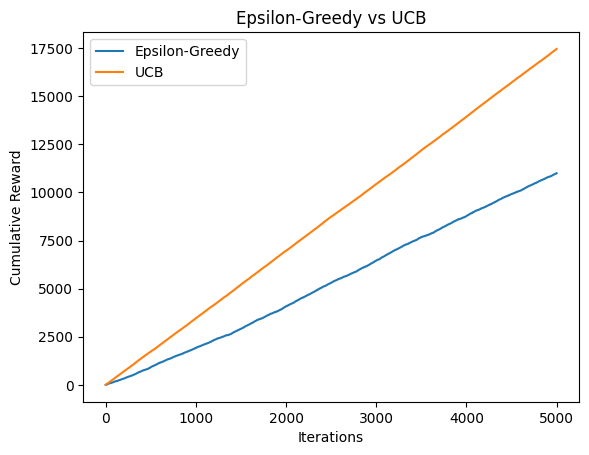

In [ ]:
arms = 50
true_means = np.random.normal(0, 1, arms)
bandit = MultiArmedBandit(arms, true_means)

epsilon = 0.35
epsilon_rewards = epsilon_greedy(bandit, epsilon, 5000)

c = 2
ucb_rewards = ucb(bandit, c, 5000)


plt.plot(np.cumsum(epsilon_rewards), label="Epsilon-Greedy")
plt.plot(np.cumsum(ucb_rewards), label="UCB")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.title("Epsilon-Greedy vs UCB")
plt.show()